In [173]:
from IPython import get_ipython
from IPython.display import display
!pip install pandas scikit-learn matplotlib

import pandas as pd
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
from sklearn.compose import ColumnTransformer


In [174]:
try:
    df_real = pd.read_csv('base_princ_modificado.csv', encoding='utf-8')
    print("CSV lido com sucesso usando encoding='utf-8'")
except UnicodeDecodeError:
    print("Erro ao ler CSV com encoding='utf-8'. Tentando encoding='latin1'.")
    try:
        df_real = pd.read_csv('base_princ_modificado.csv', encoding='latin1')
        print("CSV lido com sucesso usando encoding='latin1'")
    except Exception as e:
        print(f"Erro ao ler CSV com encoding='latin1': {e}")
        exit()
display(df_real.head())


CSV lido com sucesso usando encoding='utf-8'


,Idade,Genero,Cor/raca/etnia,PCD,UF,Regiao onde mora,Nível de Ensino,Área de formação,Situação de trabalho
0,31,0,1,0,12,2,5,0,Empregado(a)
1,30,0,1,0,7,2,2,0,Empregado(a)
2,37,1,0,0,24,2,2,0,Empregado(a)
3,22,0,6,0,24,2,1,0,Desempregado(a)
4,34,0,1,0,12,2,5,1,Empregado(a)


In [175]:
print("\nTipos de dados originais:")
print(df_real.dtypes)

print("\nValores ausentes na coluna 'Regiao onde mora' antes do processamento:")
print(df_real['Regiao onde mora'].isnull().sum())

if 'Regiao onde mora' in df_real.columns:
    df_real['Regiao onde mora'] = df_real['Regiao onde mora'].fillna('Missing Region')
    print("\nValores ausentes preenchidos com 'Missing Region'.")
    print(df_real['Regiao onde mora'].isnull().sum())
    print(df_real['Regiao onde mora'].unique())



Tipos de dados originais:
Idade                    int64
Genero                   int64
Cor/raca/etnia           int64
PCD                      int64
UF                       int64
Regiao onde mora         int64
Nível de Ensino          int64
Área de formação         int64
Situação de trabalho    object
dtype: object

Valores ausentes na coluna 'Regiao onde mora' antes do processamento:
0

Valores ausentes preenchidos com 'Missing Region'.
0
[2 1 3 4 0]


In [176]:
colunas_numericas = ['Idade']
colunas_categoricas = ['Regiao onde mora', 'Genero', 'Cor/raca/etnia', 'PCD', 'UF',
                        'Nível de Ensino', 'Área de formação', 'Situação de trabalho']

colunas_numericas_existentes = [col for col in colunas_numericas if col in df_real.columns]
colunas_categoricas_existentes = [col for col in colunas_categoricas if col in df_real.columns]


In [177]:
transformers_list = []

if colunas_numericas_existentes:
    transformers_list.append(('num', MinMaxScaler(), colunas_numericas_existentes))

if colunas_categoricas_existentes:
    transformers_list.append(('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), colunas_categoricas_existentes))

if transformers_list:
    preprocessor = ColumnTransformer(
        transformers=transformers_list,
        remainder='drop'
    )


In [178]:
df_processed = preprocessor.fit_transform(df_real)
feature_names_processed = preprocessor.get_feature_names_out()
df_processed_df = pd.DataFrame(df_processed, columns=feature_names_processed, index=df_real.index)

display(df_processed_df.head())
print(df_processed_df.dtypes)


,num__Idade,cat__Regiao onde mora_0,cat__Regiao onde mora_1,cat__Regiao onde mora_2,cat__Regiao onde mora_3,cat__Regiao onde mora_4,cat__Genero_0,cat__Genero_1,cat__Cor/raca/etnia_0,cat__Cor/raca/etnia_1,...,cat__Área de formação_0,cat__Área de formação_1,cat__Área de formação_2,cat__Área de formação_3,cat__Área de formação_4,cat__Área de formação_5,cat__Área de formação_7,cat__Área de formação_8,cat__Situação de trabalho_Desempregado(a),cat__Situação de trabalho_Empregado(a)
0,0.236364,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.218182,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.345455,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.072727,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.290909,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


num__Idade                                   float64
cat__Regiao onde mora_0                      float64
cat__Regiao onde mora_1                      float64
cat__Regiao onde mora_2                      float64
cat__Regiao onde mora_3                      float64
cat__Regiao onde mora_4                      float64
cat__Genero_0                                float64
cat__Genero_1                                float64
cat__Cor/raca/etnia_0                        float64
cat__Cor/raca/etnia_1                        float64
cat__Cor/raca/etnia_2                        float64
cat__Cor/raca/etnia_3                        float64
cat__Cor/raca/etnia_4                        float64
cat__Cor/raca/etnia_5                        float64
cat__Cor/raca/etnia_6                        float64
cat__PCD_0                                   float64
cat__PCD_1                                   float64
cat__UF_1                                    float64
cat__UF_2                                    f

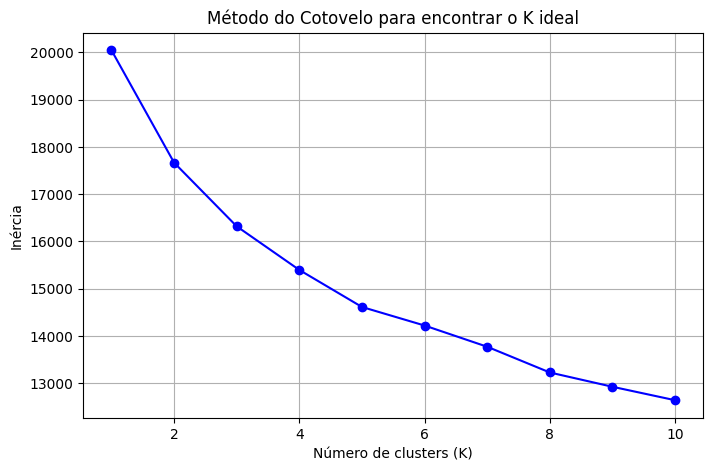

In [179]:
inertia = []
K_range = range(1, 11)

if not df_processed_df.empty and np.issubdtype(df_processed_df.values.dtype, np.number):
    for k in K_range:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(df_processed_df)
        inertia.append(kmeans.inertia_)

    plt.figure(figsize=(8, 5))
    plt.plot(K_range, inertia, 'bo-')
    plt.xlabel('Número de clusters (K)')
    plt.ylabel('Inércia')
    plt.title('Método do Cotovelo para encontrar o K ideal')
    plt.grid(True)
    plt.show()


In [180]:
def save_fig_as_png(figure, filename="cotovelo.png"):
    figure.savefig(filename, format='png', bbox_inches='tight')
    print(f"Figura salva como '{filename}'")

save_fig_as_png(plt.gcf(), "metodo_cotovelo.png")


Figura salva como 'metodo_cotovelo.png'


<Figure size 640x480 with 0 Axes>

In [181]:
ideal_k = 4  # Ajuste de acordo com o cotovelo
print(f"\nAplicando K-Means com {ideal_k} clusters.")
kmeans = KMeans(n_clusters=ideal_k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(df_processed_df)

df_real_com_clusters = df_real.copy()
df_real_com_clusters['cluster'] = clusters

display(df_real_com_clusters[['Idade', 'Regiao onde mora', 'cluster']].head())



Aplicando K-Means com 4 clusters.


,Idade,Regiao onde mora,cluster
0,31,2,2
1,30,2,2
2,37,2,3
3,22,2,2
4,34,2,2


In [182]:
print(df_real_com_clusters['cluster'].value_counts())

# Análise numérica
print("\nMédia das colunas numéricas por cluster:")
if colunas_numericas_existentes:
    print(df_real_com_clusters.groupby('cluster')[colunas_numericas_existentes].mean())

# Análise categórica
for cat_col in colunas_categoricas_existentes:
    if cat_col in df_real_com_clusters.columns:
        print(f"\nDistribuição da coluna '{cat_col}' por cluster:")
        display(pd.crosstab(df_real_com_clusters['cluster'], df_real_com_clusters[cat_col]))


cluster
2    1723
0    1166
1    1152
3    1083
Name: count, dtype: int64

Média das colunas numéricas por cluster:
             Idade
cluster           
0        31.960549
1        31.775174
2        32.025537
3        32.031394

Distribuição da coluna 'Regiao onde mora' por cluster:


Regiao onde mora,0,1,2,3,4
cluster,,,,,
0,29,201,0,807,129
1,35,257,622,102,136
2,0,0,1723,0,0
3,18,147,796,49,73



Distribuição da coluna 'Genero' por cluster:


Genero,0,1
cluster,,
0,990,176
1,1152,0
2,1723,0
3,0,1083



Distribuição da coluna 'Cor/raca/etnia' por cluster:


Cor/raca/etnia,0,1,2,3,4,5,6
cluster,,,,,,,
0,14,1122,2,5,0,3,20
1,18,0,3,5,965,9,152
2,69,1541,4,4,0,3,102
3,39,642,3,2,290,6,101



Distribuição da coluna 'PCD' por cluster:


PCD,0,1
cluster,,
0,1137,29
1,1126,26
2,1699,24
3,1053,30



Distribuição da coluna 'UF' por cluster:


UF,1,2,3,4,5,6,7,8,9,10,...,16,17,18,19,20,21,23,24,25,26
cluster,,,,,,,,,,,,,,,,,,,,,
0,8,2,10,44,48,59,0,34,4,25,...,45,10,0,20,264,3,205,0,4,3
1,15,2,10,71,57,68,42,39,12,14,...,42,11,135,15,14,1,30,307,11,2
2,0,0,0,0,0,0,44,0,0,0,...,0,0,190,0,0,0,0,1235,0,0
3,8,0,9,40,28,47,20,18,4,6,...,37,1,107,8,13,3,15,508,7,4



Distribuição da coluna 'Nível de Ensino' por cluster:


Nível de Ensino,0,1,2,3,4,5
cluster,,,,,,
0,22,160,342,415,174,53
1,23,183,411,381,119,35
2,40,209,642,591,185,56
3,15,114,352,394,148,60



Distribuição da coluna 'Área de formação' por cluster:


Área de formação,0,1,2,3,4,5,7,8
cluster,,,,,,,,
0,573,207,224,29,65,20,32,16
1,604,185,220,30,67,16,16,14
2,845,232,398,41,125,43,22,17
3,460,166,200,28,103,48,45,33



Distribuição da coluna 'Situação de trabalho' por cluster:


Situação de trabalho,Desempregado(a),Empregado(a)
cluster,,
0,90,1076
1,102,1050
2,128,1595
3,146,937


| Cluster | Nome sugerido                      | Justificativa                                                                     |
| ------- | ---------------------------------- | --------------------------------------------------------------------------------- |
| **0**   | **Mulheres diversas empregadas**   | Majoritariamente mulheres, variadas regiões e UFs, bem empregadas.                |
| **1**   | **Mulheres pardas multiestaduais** | 100% mulheres, maioria etnia 4 (parda), distribuição em vários estados.           |
| **2**   | **Mulheres brancas concentradas**  | 100% mulheres, maioria branca, todas da mesma região e UF, maior empregabilidade. |
| **3**   | **Homens diversos e vulneráveis**  | 100% homens, com maior taxa de desemprego e diversidade étnica/regional.          |


📊 Distribuição dos clusters (tamanho de cada grupo)
Cluster	Quantidade

2	1723

0	1166

1	1152

3	1083

O cluster 2 é o maior, e o cluster 3 é o menor.


🎂 Idade média por cluster


Cluster	Idade média

0	31,96

1	31,77

2	32,03

3	32,03

As idades são muito próximas, sem diferença significativa.

🏡 Região onde mora

Cluster 2: Todos do grupo 2 estão na região 2 (100%). Isso indica que a região 2 é fortemente representativa nesse cluster.


Cluster 0: Maioria na região 3 (807), seguido pela região 1 (201).


Cluster 1: Distribuição mais equilibrada, mas muitos na região 2 (622) e 1 (257).

Cluster 3: Principalmente na região 2 (796), seguido pela 1 (147).

🟢 Conclusão: O cluster 2 representa claramente uma população concentrada geograficamente (região 2). Os outros clusters são mais mistos, mas a região 2 ainda é predominante.

👤 Gênero por cluster
Cluster	Feminino (0)	Masculino (1)

0	990	176

1	1152	0

2	1723	0

3	0	1083

🟢 Conclusão:

Clusters 1 e 2 são 100% femininos.

Cluster 3 é 100% masculino.

Cluster 0 é majoritariamente feminino, com alguns homens.


🎨 Cor/raça/etnia
Cluster 1: Principalmente da categoria 4 (965 pessoas), o que pode representar, por exemplo, pessoas pardas (dependendo da codificação).

Cluster 2: Predomínio da categoria 1 (1541), talvez brancos.

Cluster 3: Dividido entre categoria 1 (642) e categoria 4 (290).

Cluster 0: Grande concentração na categoria 1 (1122).



🟢 Conclusão: Diferenças raciais entre os clusters, com destaque para:

Cluster 1: maioria de um grupo étnico específico (categoria 4).

Clusters 0 e 2: maioria na categoria 1.

🧑‍🦽 Pessoa com deficiência (PCD)
A porcentagem de PCD é baixa em todos os clusters (~2%).

🗺️ UF (Unidade da Federação)
Cluster 2: quase todos de uma única UF (código 24). Isso pode indicar uma região muito localizada, como um estado específico.

Cluster 1: maior diversidade de UFs.

Cluster 3: bastante variado, mas também forte presença da UF 24 (508 pessoas).

Cluster 0: também variado, mas com destaque para UF 20 (264) e 23 (205).

🟢 Conclusão: Cluster 2 é o mais regionalmente concentrado, os demais são mais distribuídos.

🎓 Nível de Ensino
Cluster 2 possui os maiores números em todos os níveis, com destaque para:

Nível 2 a 4 (provavelmente ensino médio completo até superior em andamento).

📚 Área de formação
Cluster 2 tem os maiores números nas áreas 0 (845), 2 (398) e 4 (125).

🟢 Conclusão: Pessoas do cluster 2 são mais concentradas em determinadas áreas de formação, com provável ênfase técnica ou de base mais ampla.

💼 Situação de trabalho
Cluster	Desempregados	Empregados
0	90	1076
1	102	1050
2	128	1595
3	146	937

🟢 Conclusão:

O cluster 2 possui o maior número absoluto de pessoas empregadas.

O cluster 3 tem a maior taxa proporcional de desemprego (146 de 1083).

🧠 Resumo dos Perfis por Cluster

Cluster	Perfil Resumido

0	Majoritariamente feminino, região variada (3 e 1), maioria branca, alta escolaridade, bem empregada.

1	100% feminino, mais racialmente diverso (categoria 4), ampla distribuição regional, empregadas.

2	100% feminino, todos da mesma região e UF (extrema homogeneidade), maioria branca, maior empregabilidade.

3	100% masculino, maioria branca ou parda, maior taxa de desemprego, variedade regional.



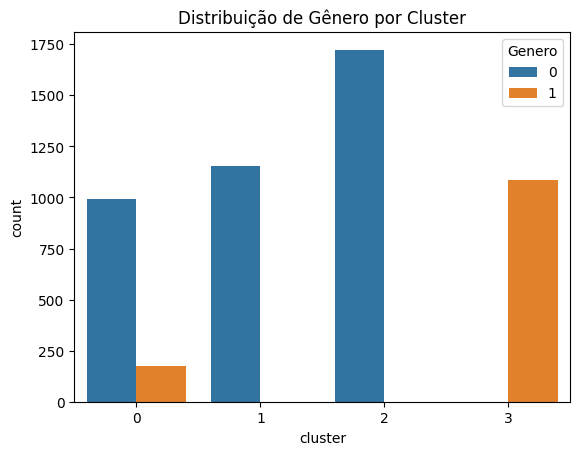

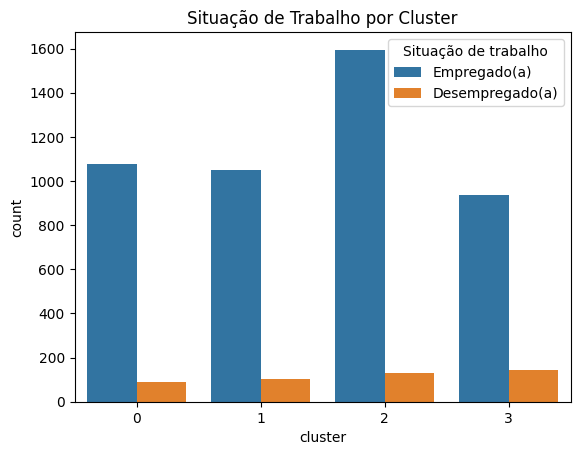

In [186]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gênero por cluster
# Use df_real_com_clusters which contains the 'cluster' column
sns.countplot(data=df_real_com_clusters, x='cluster', hue='Genero')
plt.title("Distribuição de Gênero por Cluster")
plt.show()

# Situação de trabalho por cluster
# Use df_real_com_clusters which contains the 'cluster' column
sns.countplot(data=df_real_com_clusters, x='cluster', hue='Situação de trabalho')
plt.title("Situação de Trabalho por Cluster")
plt.show()


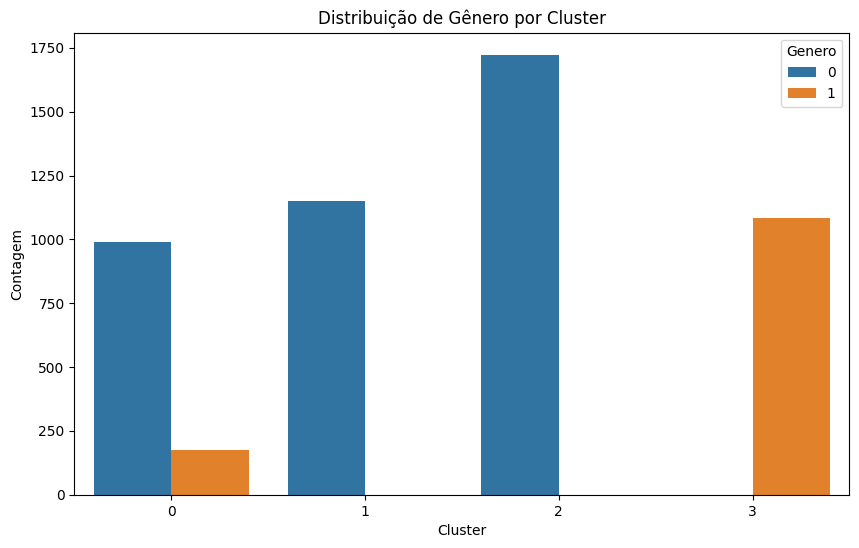

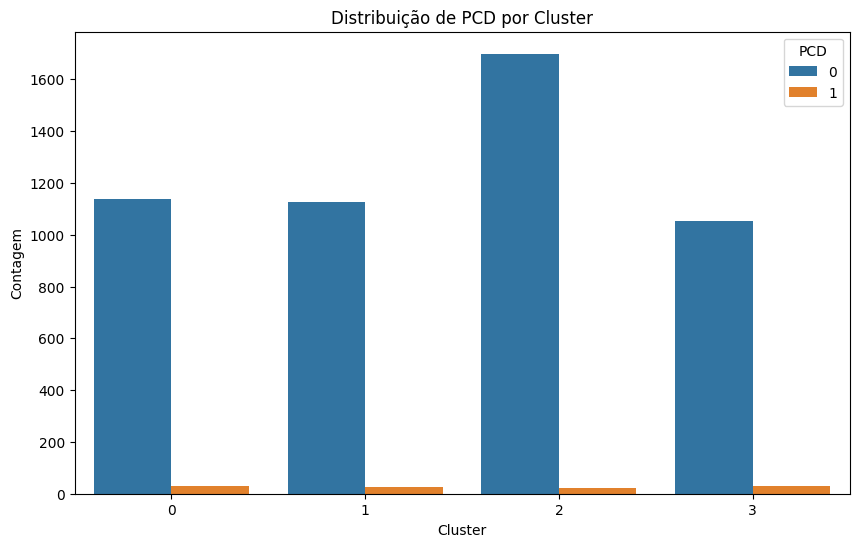

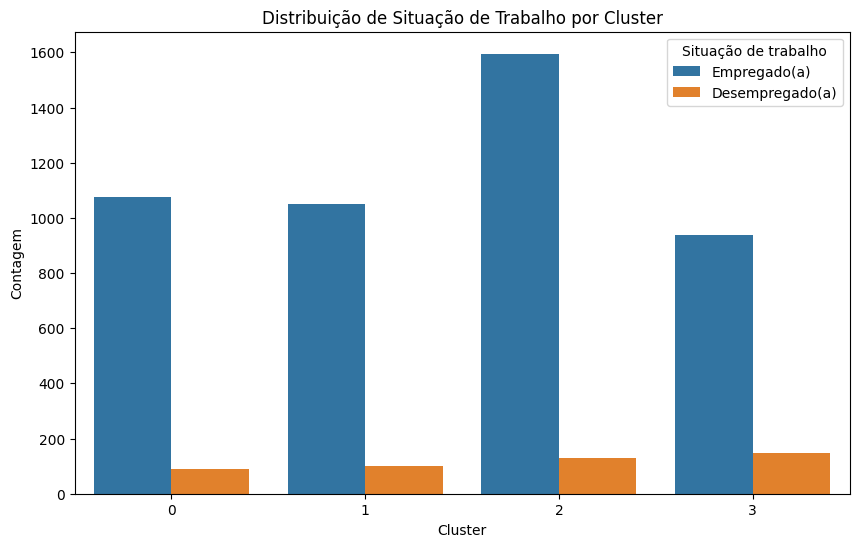

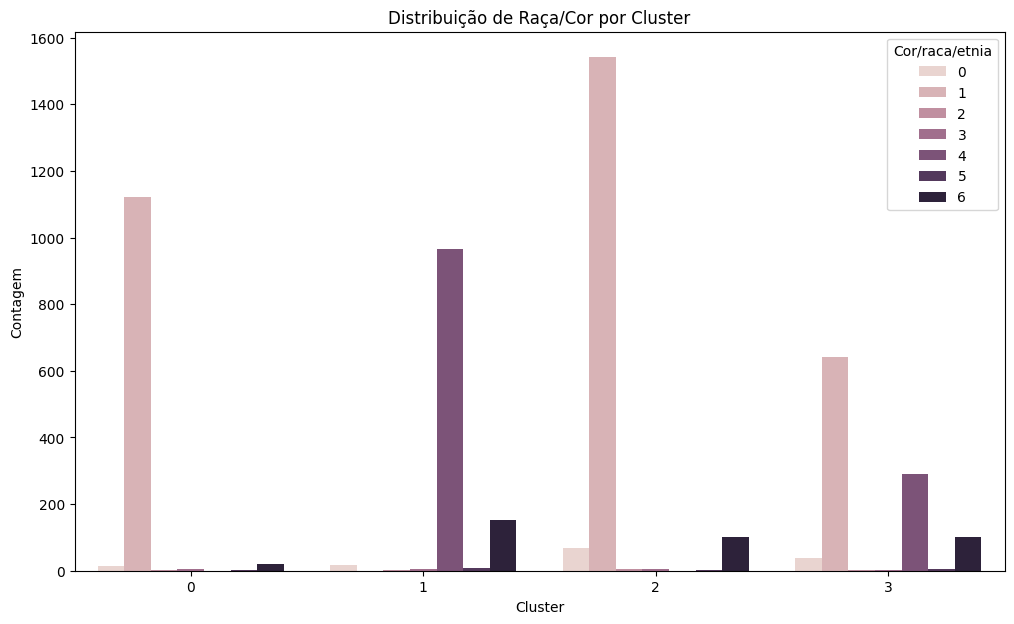

In [188]:
# prompt: gere gráfico de barras agrupadas por cluster, Gênero, PCD, Situação de trabalho, Raça/cor.

# Gráfico de barras agrupadas por cluster, Gênero
plt.figure(figsize=(10, 6))
sns.countplot(data=df_real_com_clusters, x='cluster', hue='Genero')
plt.title("Distribuição de Gênero por Cluster")
plt.xlabel("Cluster")
plt.ylabel("Contagem")
plt.show()

# Gráfico de barras agrupadas por cluster, PCD
plt.figure(figsize=(10, 6))
sns.countplot(data=df_real_com_clusters, x='cluster', hue='PCD')
plt.title("Distribuição de PCD por Cluster")
plt.xlabel("Cluster")
plt.ylabel("Contagem")
plt.show()

# Gráfico de barras agrupadas por cluster, Situação de trabalho
plt.figure(figsize=(10, 6))
sns.countplot(data=df_real_com_clusters, x='cluster', hue='Situação de trabalho')
plt.title("Distribuição de Situação de Trabalho por Cluster")
plt.xlabel("Cluster")
plt.ylabel("Contagem")
plt.show()

# Gráfico de barras agrupadas por cluster, Raça/cor
# Assuming 'Cor/raca/etnia' is the correct column name for Raça/cor
if 'Cor/raca/etnia' in df_real_com_clusters.columns:
    plt.figure(figsize=(12, 7))
    sns.countplot(data=df_real_com_clusters, x='cluster', hue='Cor/raca/etnia')
    plt.title("Distribuição de Raça/Cor por Cluster")
    plt.xlabel("Cluster")
    plt.ylabel("Contagem")
    plt.show()
else:
    print("Coluna 'Cor/raca/etnia' não encontrada no DataFrame.")

<Figure size 1500x800 with 0 Axes>

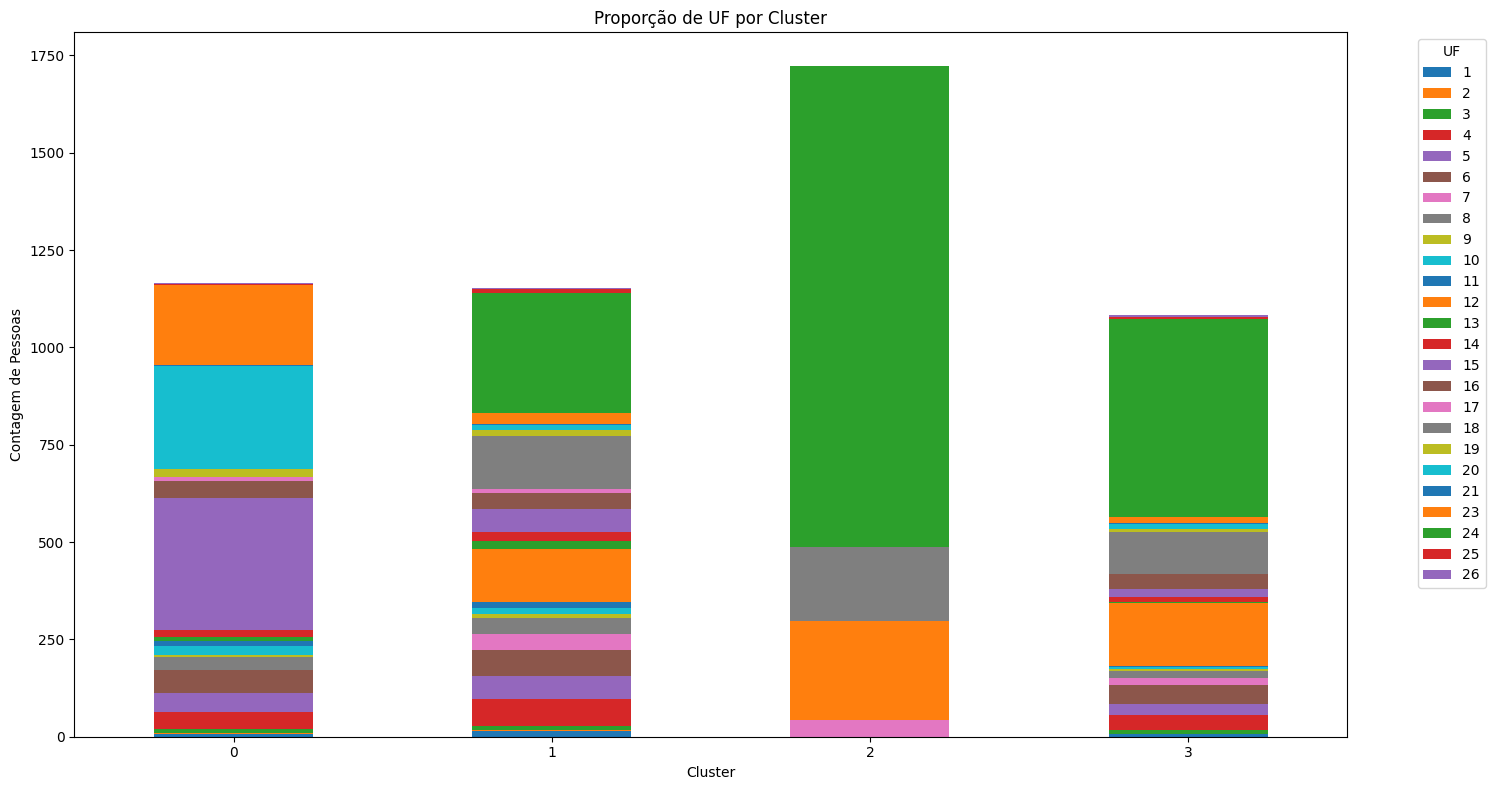

In [189]:
# prompt: gere um grafico Gráfico de pizza (ou barras empilhadas): Proporção de UF por cluster (mostrando concentração geográfica).

# Gere os dados para o gráfico de proporção de UF por cluster
if 'UF' in df_real_com_clusters.columns:
  uf_cluster_counts = df_real_com_clusters.groupby(['cluster', 'UF']).size().unstack(fill_value=0)

  # Gere o gráfico de barras empilhadas
  plt.figure(figsize=(15, 8))
  uf_cluster_counts.plot(kind='bar', stacked=True, figsize=(15, 8))
  plt.title('Proporção de UF por Cluster')
  plt.xlabel('Cluster')
  plt.ylabel('Contagem de Pessoas')
  plt.xticks(rotation=0)
  plt.legend(title='UF', bbox_to_anchor=(1.05, 1), loc='upper left')
  plt.tight_layout()
  plt.show()
else:
  print("Coluna 'UF' não encontrada no DataFrame.")

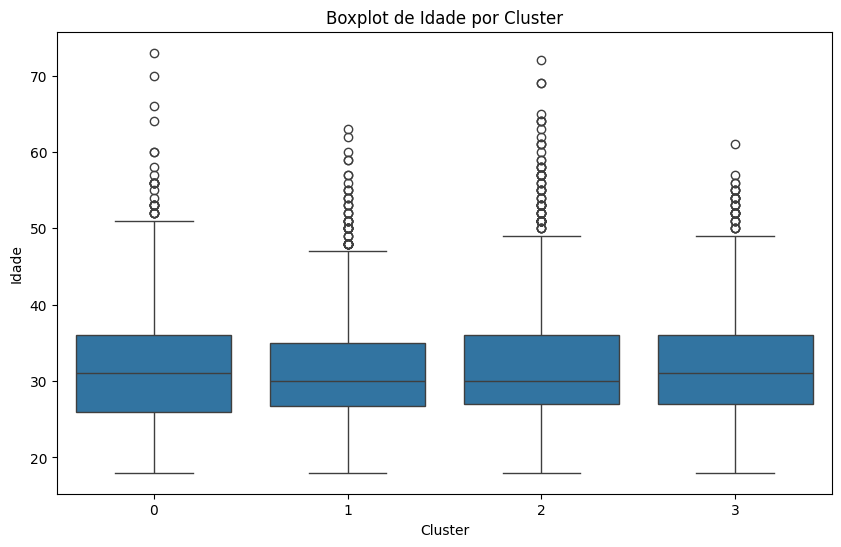

In [190]:
# prompt: gere um grafico de Boxplot de idade por cluster:
# Ver variações de distribuição, mesmo que médias estejam próximas.

# Boxplot de Idade por Cluster
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_real_com_clusters, x='cluster', y='Idade')
plt.title("Boxplot de Idade por Cluster")
plt.xlabel("Cluster")
plt.ylabel("Idade")
plt.show()

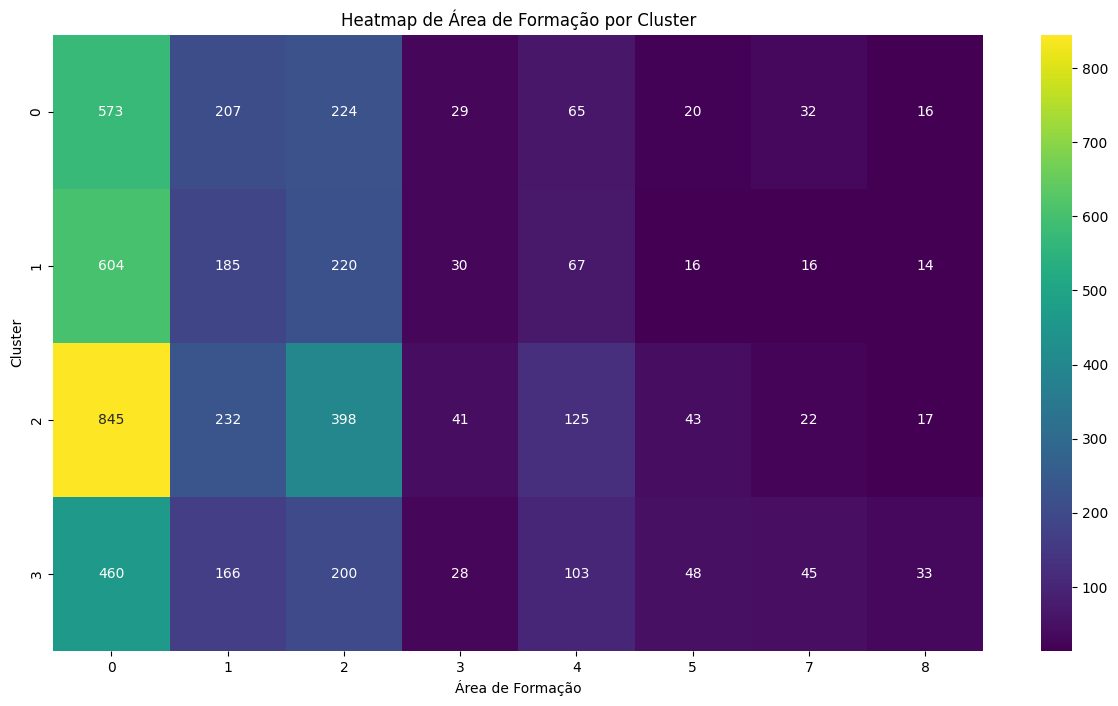

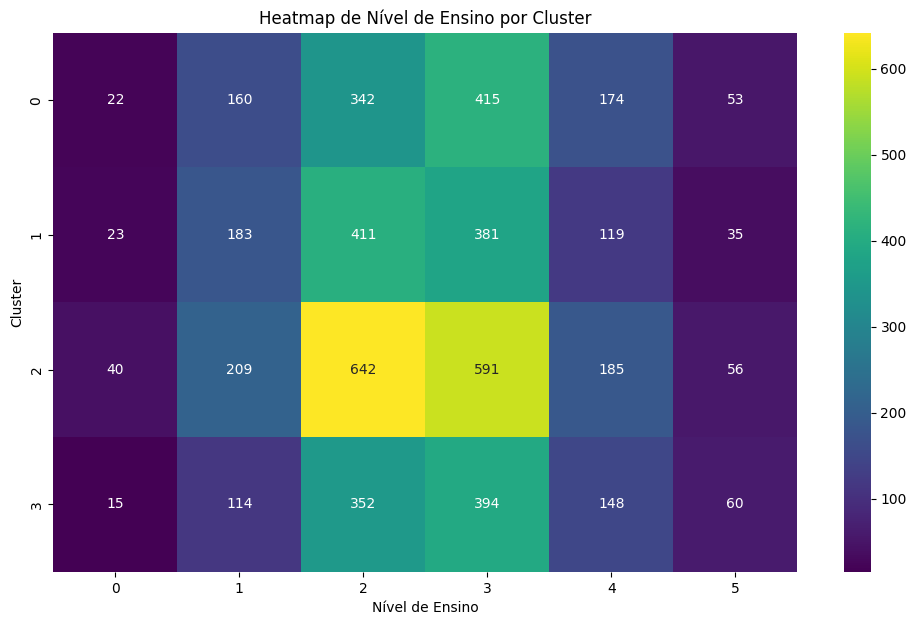

In [191]:
# prompt: gere um grafico de Mapa de calor (heatmap) para “Área de formação” ou “Nível de Ensino” por cluster:
# Para enxergar padrões mais visuais de distribuição.
# Exemplo: sns.heatmap(pivot_table, annot=True)

# Gerar dados para o heatmap de Área de Formação por Cluster
if 'Área de formação' in df_real_com_clusters.columns:
    area_formacao_cluster = pd.crosstab(df_real_com_clusters['cluster'], df_real_com_clusters['Área de formação'])

    # Gerar o heatmap
    plt.figure(figsize=(15, 8))
    sns.heatmap(area_formacao_cluster, annot=True, fmt='d', cmap='viridis')
    plt.title('Heatmap de Área de Formação por Cluster')
    plt.xlabel('Área de Formação')
    plt.ylabel('Cluster')
    plt.show()
else:
    print("Coluna 'Área de formação' não encontrada no DataFrame.")


# Gerar dados para o heatmap de Nível de Ensino por Cluster
if 'Nível de Ensino' in df_real_com_clusters.columns:
    nivel_ensino_cluster = pd.crosstab(df_real_com_clusters['cluster'], df_real_com_clusters['Nível de Ensino'])

    # Gerar o heatmap
    plt.figure(figsize=(12, 7))
    sns.heatmap(nivel_ensino_cluster, annot=True, fmt='d', cmap='viridis')
    plt.title('Heatmap de Nível de Ensino por Cluster')
    plt.xlabel('Nível de Ensino')
    plt.ylabel('Cluster')
    plt.show()
else:
    print("Coluna 'Nível de Ensino' não encontrada no DataFrame.")

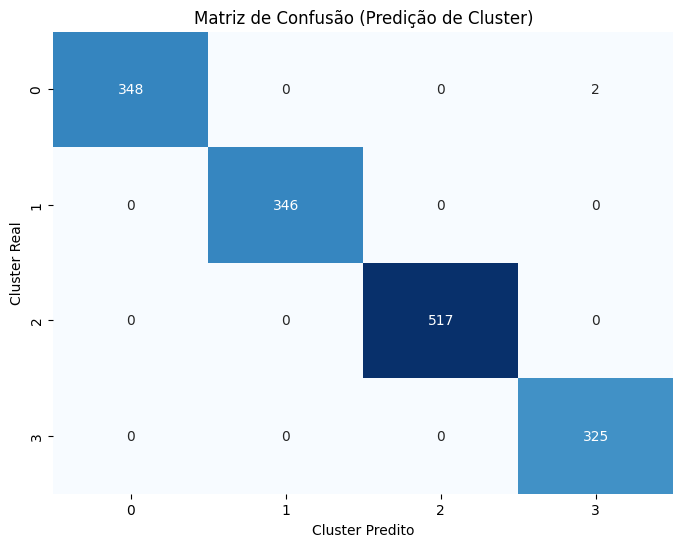


Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       350
           1       1.00      1.00      1.00       346
           2       1.00      1.00      1.00       517
           3       0.99      1.00      1.00       325

    accuracy                           1.00      1538
   macro avg       1.00      1.00      1.00      1538
weighted avg       1.00      1.00      1.00      1538



In [193]:
# prompt: gere a matriz de confusão

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Assuming 'cluster' is your target variable and you want to predict it
# based on the processed features. This is just an example.
# A more typical scenario would be to have a ground truth label for
# the confusion matrix, which is not present in this clustering context.

# If you want to build a classifier to predict the cluster based on features:
# First, split data into training and testing sets
X = df_processed_df
y = clusters # The clusters found by K-Means are used as "labels"

# Check if there's enough data for splitting and if there are multiple classes
if len(X) > 10 and len(np.unique(y)) > 1: # Basic check for valid data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

    # Train a simple classifier (e.g., Logistic Regression)
    model = LogisticRegression(max_iter=1000) # Increase max_iter for convergence
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Generate the confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title('Matriz de Confusão (Predição de Cluster)')
    plt.xlabel('Cluster Predito')
    plt.ylabel('Cluster Real')
    plt.show()

    # Generate and print classification report
    print("\nRelatório de Classificação:")
    print(classification_report(y_test, y_pred))

else:
    print("\nDados insuficientes ou apenas um cluster para gerar a matriz de confusão.")
    print("A matriz de confusão é tipicamente usada para avaliar um classificador com rótulos de verdade.")
    print("Neste contexto de clustering, os 'rótulos' são os clusters encontrados pelo K-Means.")
    print("Geramos uma matriz de confusão aqui como um exemplo de como um modelo pode prever os clusters.")
